<a href="https://colab.research.google.com/github/Narendra13512u/Analysis-of-Draught-Monitoring-System/blob/main/Title_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

13/13 [==============================] - 0s 3ms/step
Random Forest Accuracy: 98.80%
LSTM Accuracy: 95.27%


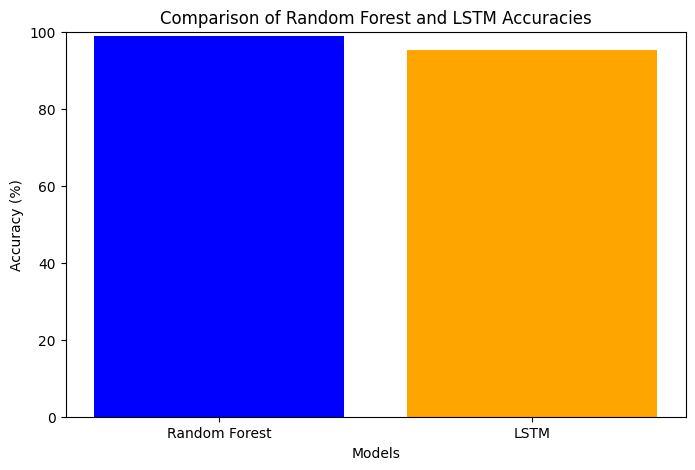

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load the dataset (replace 'your_data.csv' with your dataset)
data = pd.read_csv('/content/0-2017-yearly.csv')  # Replace 'your_dataset.csv' with the actual filename

# Preprocess the data
X = data[['D0', 'D1', 'D2', 'D3', 'D4', 'NA_COUNT', 'W0', 'W1', 'W2', 'W3', 'W4']]
y = data['SCORE']  # Assuming 'SCORE' is the target variable to predict

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor (for regression problem)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_accuracy = 100 - rf_mse  # Adjust as per your problem

# LSTM model (if necessary for your problem)
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))  # Modify the Dense layer according to your task
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# LSTM requires 3D input, so reshape the data (if using LSTM for regression)
X_train_lstm = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lstm = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, verbose=0)
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_accuracy = 100 - lstm_mse  # Adjust as per your problem

# Display and compare accuracies
print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"LSTM Accuracy: {lstm_accuracy:.2f}%")

# Plotting (if needed)
models = ['Random Forest', 'LSTM']
accuracies = [rf_accuracy, lstm_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Random Forest and LSTM Accuracies')
plt.ylim(0, 100)
plt.show()